In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb

In [3]:
from sklearn import datasets

In [4]:
iris = datasets.load_iris()

In [5]:
X = iris.data
y = iris.target

In [6]:
len(X)

150

In [7]:
len(y)

150

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print(f"Shape of X_train= {X_train.shape}\nShape of X_test= {X_test.shape}\nShape of y_train= {y_train.shape}\nShape of y_test= {y_test.shape}")

Shape of X_train= (120, 4)
Shape of X_test= (30, 4)
Shape of y_train= (120,)
Shape of y_test= (30,)


In [10]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [11]:
params = {"max_depth": 3,
          "eta": 0.3,
          "silent": 1,
          "num_class": 3
    
}

In [12]:
num_round = 20

In [13]:
bst = xgb.train(params, dtrain, num_boost_round=num_round)

In [14]:
pred = bst.predict(dtest)

In [15]:
pred

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0.], dtype=float32)

In [16]:
len(pred)

30

In [17]:
pred[:10]

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1.], dtype=float32)

In [18]:
from sklearn.metrics import precision_score

In [19]:
precision_score(y_test, pred, average="macro")

1.0

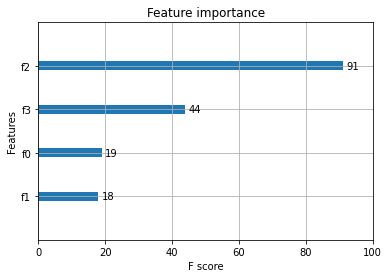

In [20]:
xgb.plot_importance(bst);

In [21]:
dtrain.feature_names

['f0', 'f1', 'f2', 'f3']

In [22]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']